In [3]:
# Importamos todo lo necesario
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [4]:
# pip install -U scikit-learn

In [5]:
df = pd.read_csv('insurance.csv')
df.head()
#Nuestro target será la prima del seguro (charges)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Exploramos un poco el dataframe
df.info()
#numéricas tenemos age, bmi, children i charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Cuántos valores únicos tenemos de cada columna??
df.nunique()
#sex i smoker podemos convertirla en variables binarias

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
#Estadísticos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#Hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

1

In [10]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [11]:
#Volvemos a comprobar: hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

0

# Preprocesado

In [12]:
#Preproceasado
#Numéricas: age, bmi, children >> son normales?

from scipy import stats
from scipy.stats import shapiro

# H0: la variables es normal
# H1: La variable no es normal

# si p-value > 0.05 se acepta la hipotesis nula HO


In [13]:
stats, p= stats.shapiro(df.age)
print(stats, p)
# devuelve la "fuerza" del descarte o aceptación  y el p-value

0.9448564052581787 6.211415541934325e-22


In [14]:
# El 0.9448 es la fuerza del descarte o aceptación de la hipótesis nula. En el caso de age, se decarta la H0 
# (el p-value) es muchísmo menor que 0.05 (fijemos que es un número e-22)y la fuerza el descarte es 0.99

In [15]:
#hay que hacer este import aquí (no entendemos porqué no funciona solo con el anterior)
from scipy.stats import shapiro

normal = []
no_normal = []
for name in ['age', 'bmi','children']:
    stats, p=shapiro(df[name])
    if p > 0.05:
        print(name, "es normal", stats, p)
        normal.append(name)
    else:
         print(name, "no es normal", stats, p)
         no_normal.append(name)
print("Normales:", normal)
print("No Normales", no_normal)

age no es normal 0.9448564052581787 6.211415541934325e-22
bmi no es normal 0.9938761591911316 2.5783332603168674e-05
children no es normal 0.8233991861343384 5.4062968267062164e-36
Normales: []
No Normales ['age', 'bmi', 'children']


<Axes: >

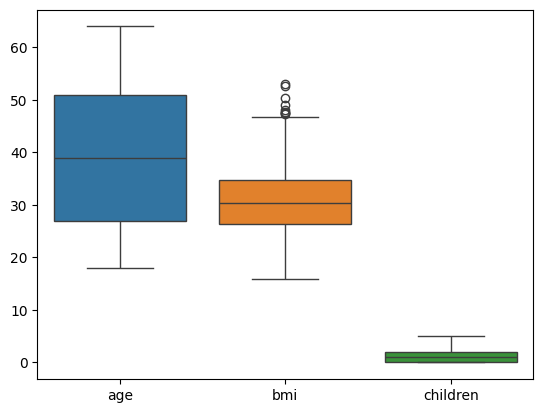

In [16]:
# Ninguna es nomral
# Si hubiera alguna Normal aplicamos StandardScaler() >> no es nuestro caso
# Aplicamos normalización a las No Normales
# Primero, chequear outliers con los boxplots
sns.boxplot(data=df[no_normal])


In [17]:
# bmi CON OUTLIERS >> aplicamos RobustScaler
# SIN OUTLIERS >> aplicamos MinMaxScaler
# Hacemos copia del dataset original dt_t : dataset transformado
df_t = df.copy()

In [18]:
# Importamos
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [19]:
rs = RobustScaler()
mms = MinMaxScaler()

In [20]:
df_t [['bmi']] = rs.fit_transform(df_t[['bmi']]) # para pasar 2 dimensiones doble []
df_t

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.297265,0,yes,southwest,16884.92400
1,18,male,0.400713,1,no,southeast,1725.55230
2,28,male,0.309156,3,no,southeast,4449.46200
3,33,male,-0.914982,0,no,northwest,21984.47061
4,32,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,0.067776,3,no,northwest,10600.54830
1334,18,female,0.180737,0,no,northeast,2205.98080
1335,18,female,0.766944,0,no,southeast,1629.83350
1336,21,female,-0.546968,0,no,southwest,2007.94500


In [21]:
df_t [['age']] = mms.fit_transform(df_t[['age']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0,yes,southwest,16884.92400
1,0.000000,male,0.400713,1,no,southeast,1725.55230
2,0.217391,male,0.309156,3,no,southeast,4449.46200
3,0.326087,male,-0.914982,0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,3,no,northwest,10600.54830
1334,0.000000,female,0.180737,0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0,no,southwest,2007.94500


In [22]:
df_t [['children']] = mms.fit_transform(df_t[['children']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,0.6,no,northwest,10600.54830
1334,0.000000,female,0.180737,0.0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0.0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0.0,no,southwest,2007.94500


In [ ]:
#################################################
#################  8a sessió ####################
#################################################

In [23]:
df_t.head()


,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520


In [ ]:
# Ahora nos faltan las categóricas >> onehotencoder, labelencoder, dummies, binarizer, etc

In [24]:
# Region tiene 4 valores >> podemos hacer labelencoder y pasará a ser 0, 1, 2, 3
df_t.region.unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [54]:
#Primero vemos como funciona dummies
dummies = ['sex']
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=False).astype(int)
# df_t['sex'] = pd.get_dummies(data=df_t, columns='sex', prefix='sex')

,sex
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [38]:
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=True) # con True para eliminar multicolinealidad; así evitamos sobrerepresentación de variables
# que nos explican lo mismo

,sex_male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [61]:
#Si lo hacemos con region
pd.get_dummies(df_t[['region']], prefix='sex', drop_first=False).astype(int)

,region
0,3
1,2
2,2
3,1
4,1
...,...
1333,1
1334,0
1335,2
1336,3


In [59]:
dummies = ['sex','smoker']
df_t [dummies]= pd.get_dummies(df_t[dummies], drop_first=True).astype(int)

In [60]:
# Importamos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_t['region'] = le.fit_transform(df_t['region'])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,-0.297265,0.0,1,3,16884.92400
1,0.000000,1,0.400713,0.2,0,2,1725.55230
2,0.217391,1,0.309156,0.6,0,2,4449.46200
3,0.326087,1,-0.914982,0.0,0,1,21984.47061
4,0.304348,1,-0.180737,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,1,0.067776,0.6,0,1,10600.54830
1334,0.000000,0,0.180737,0.0,0,0,2205.98080
1335,0.000000,0,0.766944,0.0,0,2,1629.83350
1336,0.065217,0,-0.546968,0.0,0,3,2007.94500


<Axes: >

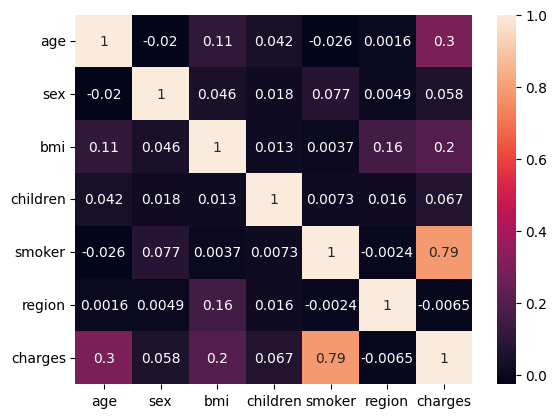

In [49]:
# REVISAR PORQUÉ NO SALE
corr = df_t.corr()
sns.heatmap(corr, annot=True)

# Modelos

In [67]:
#Importamos + entrenamos + predecimos
#REGRESIÓN
# Importamos los lineal models (regresión lineal, Lasso, Ridge)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Regresión polinómica
from sklearn.preprocessing import PolynomialFeatures
# Árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#Bosques aleatorios
from sklearn.ensemble import RandomForestRegressor
# Vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor
# Máquinas de Vectores de Soporte
from sklearn.svm import SVR
# Redes Neuronales
from sklearn.neural_network import MLPRegressor


In [62]:
#Entrenamos
# Train test 80/20
#importamos para poder dividir la muestra
from sklearn.model_selection import train_test_split
#
X = df_t.drop('charges', axis=1)
y = df_t['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [63]:
X_train.shape

(1069, 6)

In [64]:
X_test.shape

(268, 6)

In [65]:
#Aplicamos el modelo 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [68]:
#Otro
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
# Haremos un bucle mejor para ejecutar todos a la vez
models = {
    'Regresor Lineal': LinearRegression(),
    'Polinomial' : None, #es diferente a los demás
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Arbol' : DecisionTreeRegressor(),
    'Random' : RandomForestRegressor(),
    'KNN' : KNeighborsRegressor(),
    'Vectores' : SVR(),
    'Redes' : MLPRegressor()
}
for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)



c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
data_y = {} # guardaremos predicciones de cada modelo en un diccionario para que luego sea más fácil crear un Dataframe


for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
    #almaceno en el diccionario
        data_y[name] = y_pred
data_y # Nos muestra las predicciones

c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Regresor Lineal': array([12537.45825257,  9042.65466004, 15733.68114713, 26742.71809238,
        12309.75454112,  1485.45274548, 11660.30164367, 30782.40349368,
        26242.00010549, 32701.72692565,  3730.62502939, 14480.70386498,
          180.67974027,  6710.05237788, 10706.70886704, 32779.73610177,
        37434.85996717, 13494.17424545, 18061.49002714, 26977.56743227,
        14028.01710401, 13727.34177683,  3710.18290728, 32237.93158049,
        28472.36325428, 13206.53608762, 12579.94115038, 34242.10250904,
        12241.43181875,  5300.95855106,  5808.20708836,  5418.30746544,
         2882.44287118,  6475.67549208, 12284.5545486 ,  8251.81547138,
         3264.77200865,  4350.14706912,  5431.82963654, 28026.34966766,
        14832.93361655,  2925.45878047, 33449.24296565,  8910.37739994,
         6536.86648679, 27991.47195097, 14549.11827467,  2315.49687336,
        10097.36213941, 16678.3413211 ,  5864.32105207, 31333.54154614,
        14772.46857423,  8571.03956862, -1847

In [77]:
# añadimos el y_test a las predicciones
data_y['y_test'] = y_test

<Axes: >

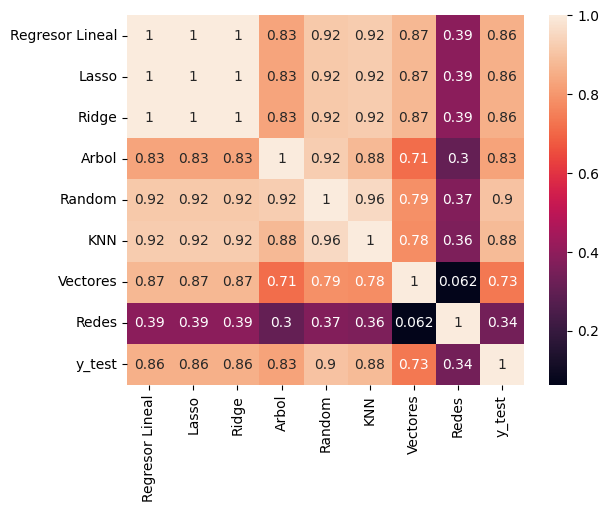

In [79]:
# Vemos cómo correlacionan los datos reales con las predicciones
df_y = pd.DataFrame(data_y)
corr_y = df_y.corr()
sns.heatmap(corr_y, annot=True)

<Axes: ylabel='Density'>

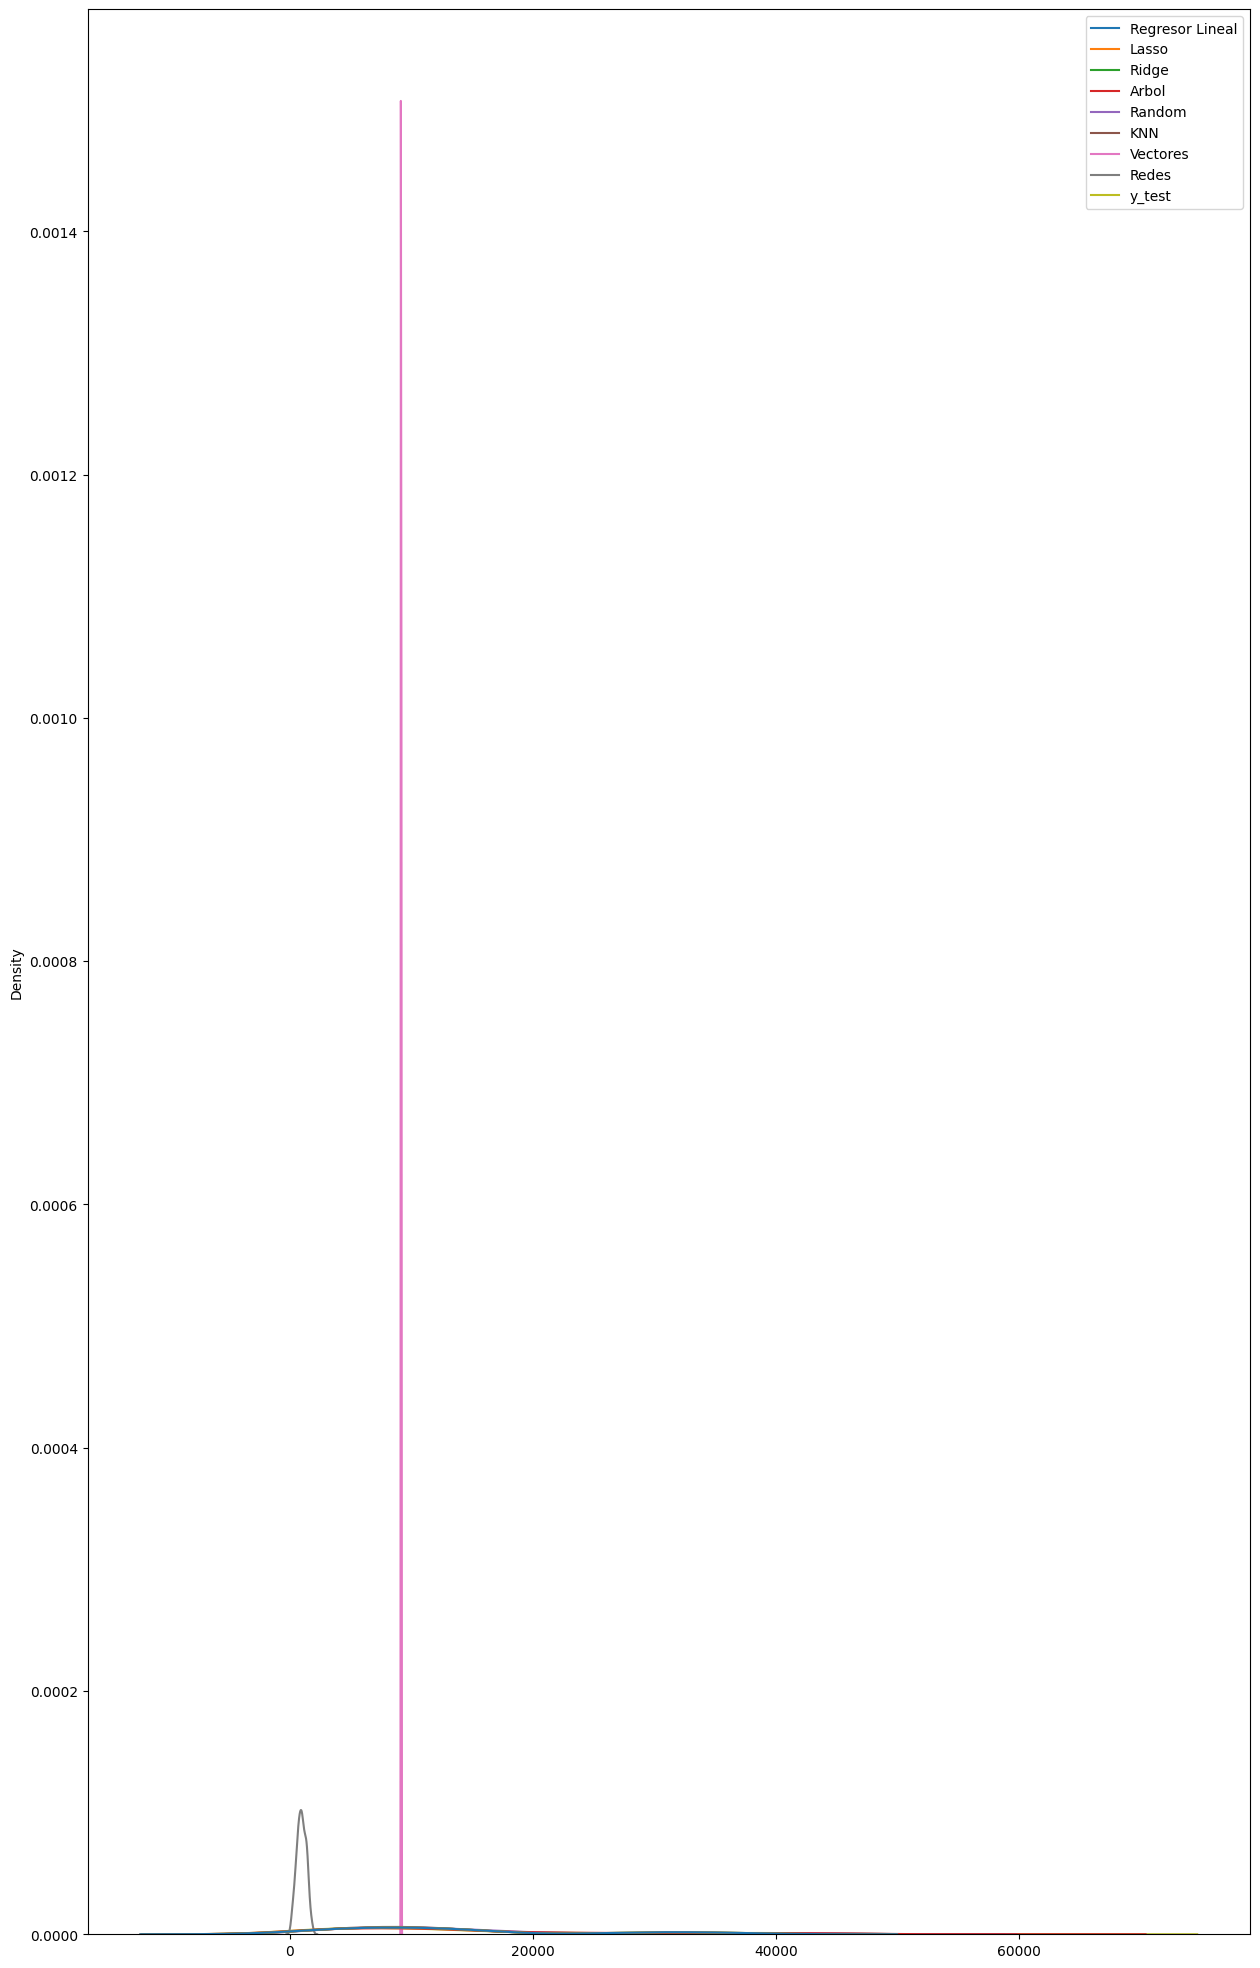

In [83]:
# línea de densidad
plt.figure(figsize=(15,25))
sns.kdeplot(df_y)

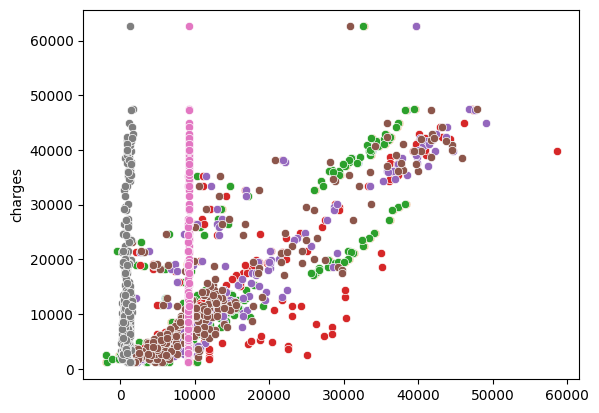

In [84]:
for name, y_values in data_y.items():
    sns.scatterplot(y = y_test, x = y_values)